In [1]:
from mtdScope import scopeEmulator
import matplotlib.pyplot as plt
import numpy as np
import time
        
#load the sample data to test
se = scopeEmulator()
se.loadData('./HV130_high_300mV_def.hd5')
#se.loadData('./HV160_lowPower_100mV_11340R.hd5')
timing_start = time.time()
points = se.getEventAdjusted(10)
xx= se.leftJumpScanFast(points[0], points[2])
plt.plot(points[0], points[2])
plt.plot(points[0][xx-100:xx+100], points[2][xx-100:xx+100])
timing_stop = time.time()
print(xx)
print('time consumed: '+str(timing_stop-timing_start))


6164
time consumed: 3.0602610111236572


jump at 6170


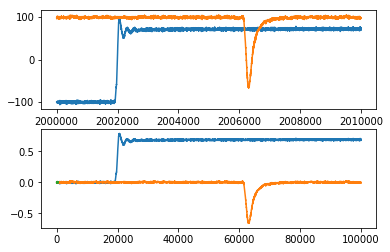

In [3]:
ievt = 200
evt1 = se.getEvent(ievt)
plt.subplot(211)
plt.plot(evt1[0], evt1[1])
plt.plot(evt1[0], evt1[2])

evt2 = se.getEventAdjusted(ievt)

nch = 2
points = evt2
n0 = se.leftJumpScan(points[0], points[nch])
print('jump at '+str(n0))
plt.subplot(212)
plt.plot(evt2[0], evt2[1])
plt.plot(evt2[0], evt2[2])
plt.plot(evt2[0][0:50], evt2[2][0:50])

[6294, 6295]
reading consume: -2.5692429542541504
calculation consume: -0.012176036834716797
reading consume: -2.538801908493042
calculation consume: -0.015444040298461914


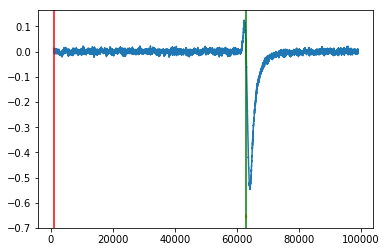

0.0
time consumed: 7.651031970977783


In [2]:

#Test on the cross finder and CFT functions
timing_start = time.time()
ievt = 1261
nch = 2
evt1 = se.getEventAdjusted(ievt)

points = se._loadedData_
n0 = se.leftJumpScan(points[0], points[nch])
fcft = se.simulateCFT(points[0], points[nch])
inte = se.crossRegion(fcft,n0)
#plt.plot(evt1[0], evt1[2])
print(inte)
plt.plot(evt1[0][100:-100], fcft(evt1[0][100:-100]))
plt.plot(evt1[0][inte[0]:inte[1]+10], evt1[2][inte[0]:inte[1]+10])
plt.plot(evt1[0][inte[0]:inte[1]+1], fcft(evt1[0][inte[0]:inte[1]+1]), color='Magenta')
plt.plot(evt1[0][inte[0]-10:inte[1]+10], fcft(evt1[0][inte[0]-10:inte[1]+10]))

ndens = 100
densdt = (evt1[0][inte[1]+10]-evt1[0][inte[0]-10])/ndens
densx = np.zeros(ndens)

for i in range(ndens):
    densx[i] = evt1[0][inte[0]-10]+i*densdt

#plt.plot(densx, fcft(densx))
res = se.getCFTiming(ievt,method = 'linear')
res2 = se.getCFTiming(ievt,method = 'newton')
#print(res)
plt.axvline((inte[1]+inte[0])/2*se.dt,color='Green')

plt.axvline(res[nch-1],color='Red')
plt.show()
print(res[nch-1]-res2[nch-1])

timing_stop = time.time()
print('time consumed: '+str(timing_stop-timing_start))

In [ ]:
#calculating the jitter
timing_start = time.time()
nevent = 1300
t0s = np.zeros(nevent, dtype = np.float64)
t1s = np.zeros(nevent, dtype = np.float64)
dtCFT = np.zeros(nevent, dtype = np.float64)
#for i in range(se.nevent):
for i in range(1200, nevent):
    if i % 10 == 0: print('processing the '+str(i)+'th events')
    res = se.getCFTiming(i, method = 'newton')
    t0s[i] = res[0]
    t1s[i] = res[1]
    dtCFT[i] = res[1] - res[0]
print('processing done!')
timing_stop = time.time()
print('time consumed: '+str(timing_stop-timing_start))

In [ ]:
#plt.hist(t0s, 10)
t0ss = t0s
t1ss = t1s
dtCFTs = dtCFT
t0s=t0ss[1200:-1]
t1s=t1ss[1200:-1]
dtCFT=dtCFTs[1200:-1]
print('trigger time jitter = '+str(t0s.std())+' ps','minimum t0 is ',t0s.min())
print('preamp time jitter = '+str(t1s.std())+' ps')
print('Walk corrected time jitter = '+str(dtCFT.std())+' ps')
plt.hist(dtCFT, 20)
st = np.argmin(t1s)
print('event '+str(st)+' is ',t1s[st])

In [ ]:
ts = se.runTimeWalk(r0=1300, r1= 1400, nstep = 10, method = 'linear')

In [ ]:
a = np.array([1,-2, -0.5])
a.argmax()